In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble as ens
from sklearn import metrics as met
from sklearn import linear_model as lin
from sklearn import svm

%matplotlib inline  

In [3]:
data = np.genfromtxt('perc3.txt')

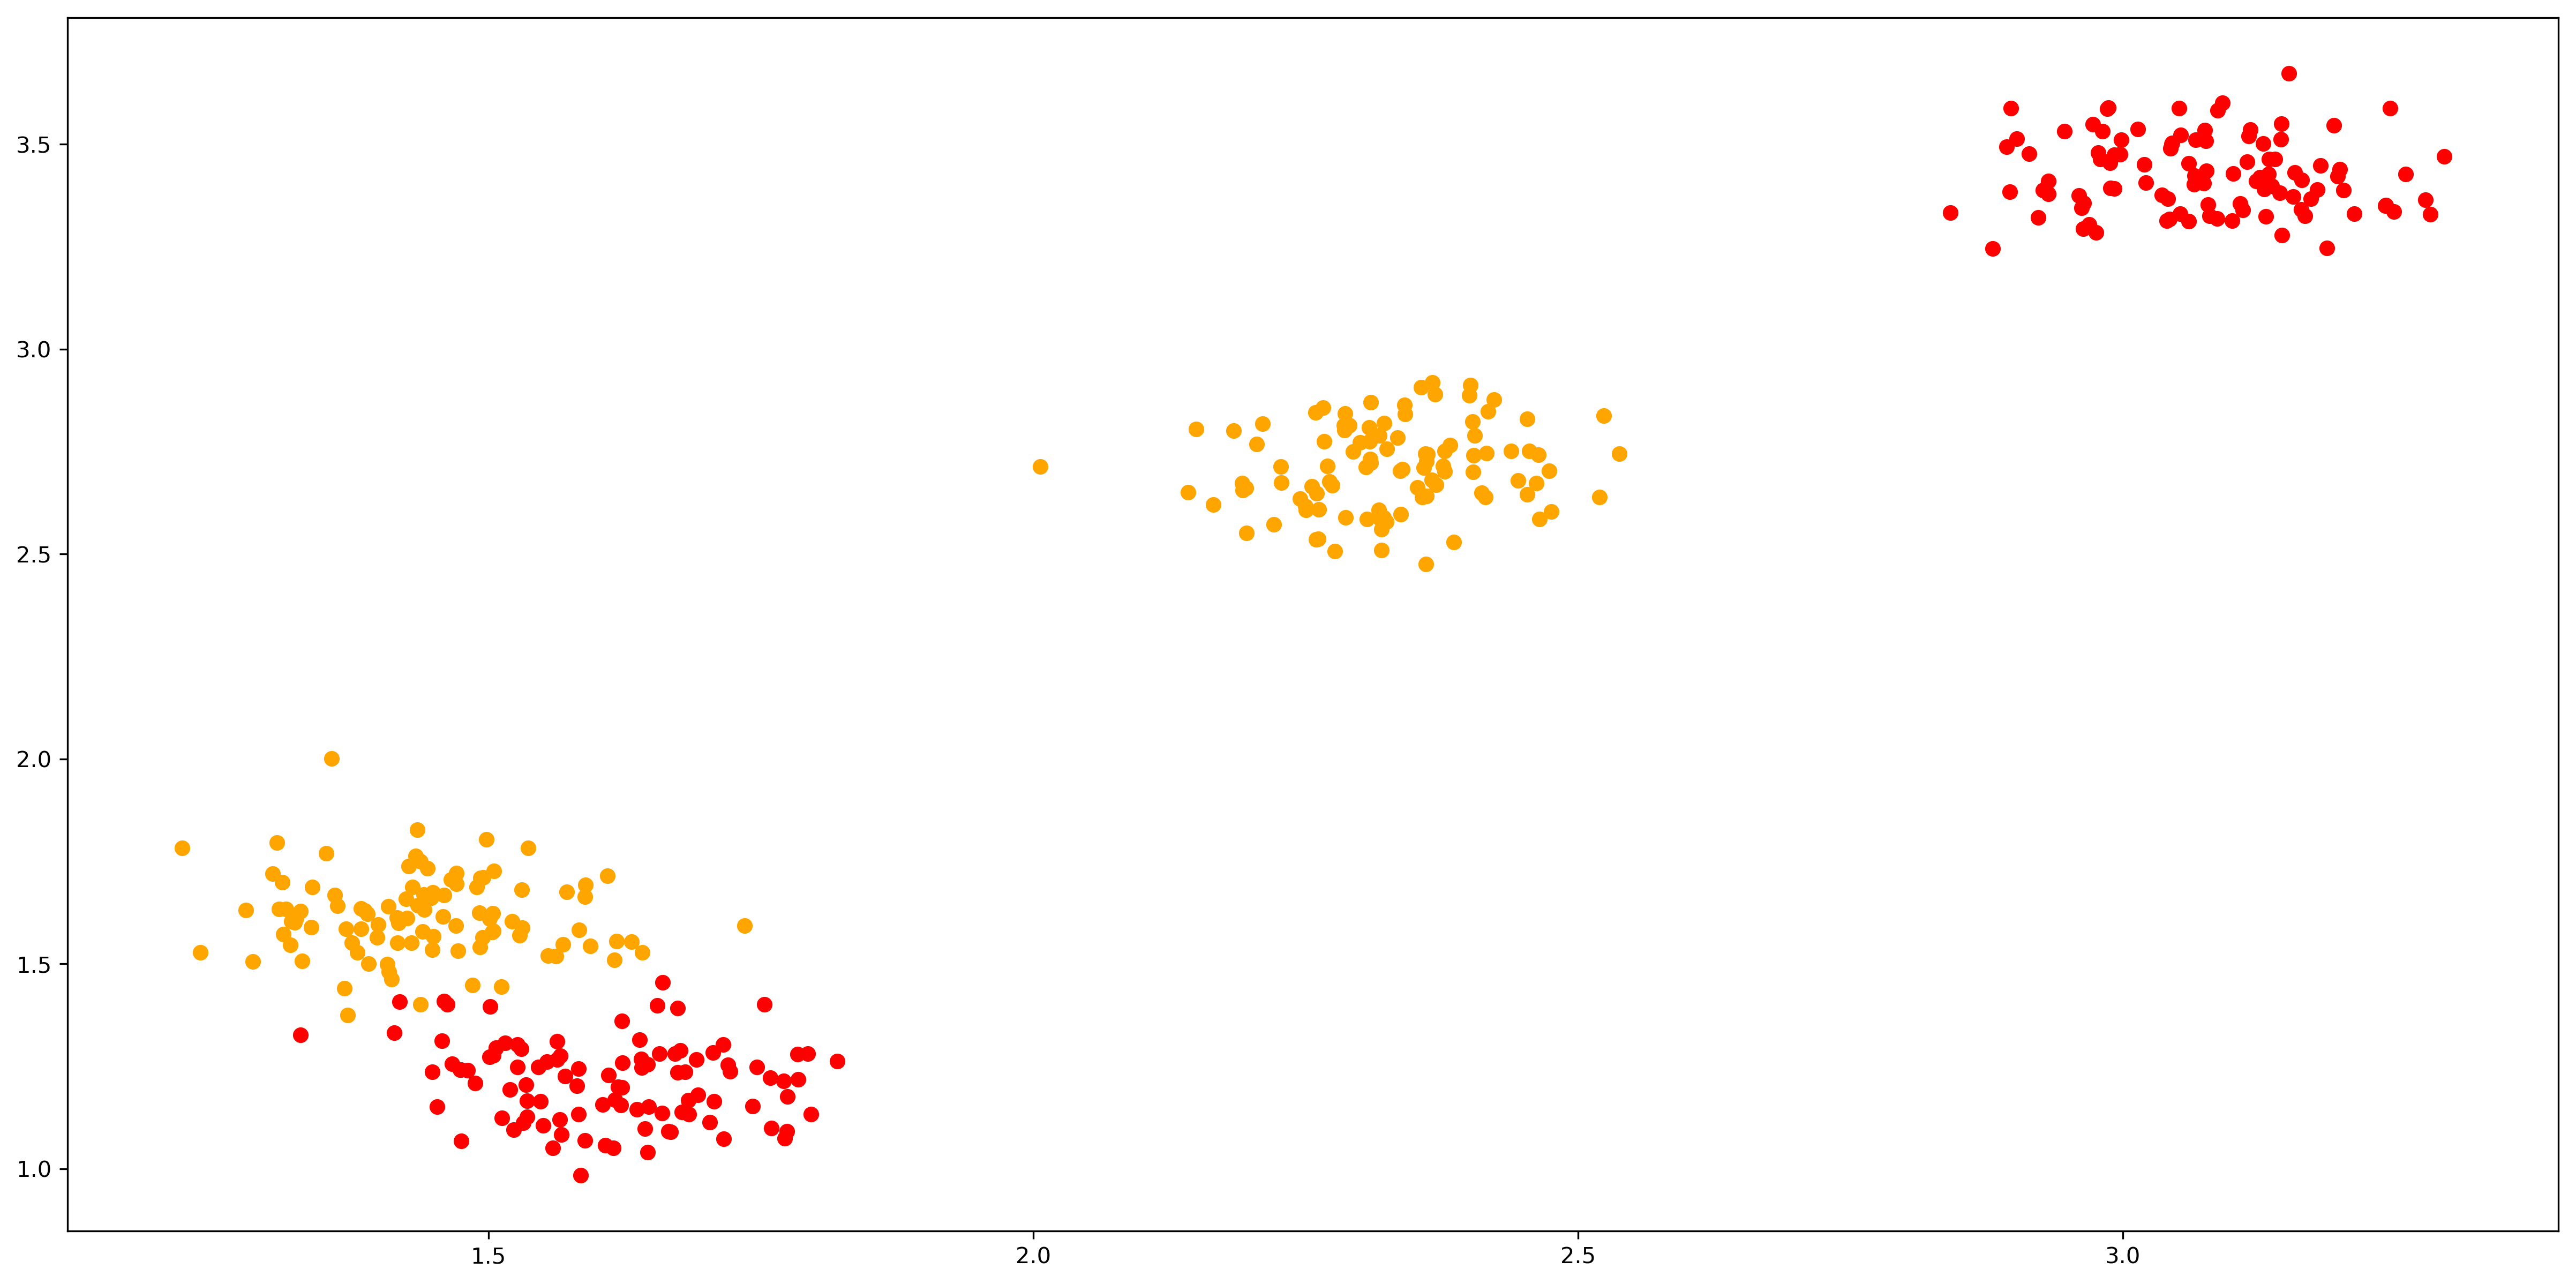

In [4]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(data[data[:,0]==0][:,1],data[data[:,0]==0][:,2],color='red')
plt.scatter(data[data[:,0]==1][:,1],data[data[:,0]==1][:,2],color='orange')

In [5]:
class LogisticRegression:
    
    def __init__(self,dim):
        self.dim_in=dim
        self.w = np.random.random((dim)).astype(np.float32)
        self.b = 0
        self.dw = np.zeros((dim)).astype(np.float32)
        self.db = 0
        self.alpha = 0.1
    
    def predict(self,x):
        return 1.0/(1.0+np.exp(-1*(self.w.dot(x)+self.b)))

    def update(self,x,y):
        n_batch = x[:,0].size
        self.dw = (y[0]-self.predict(x[0,:]))*x[0,:]/n_batch
        self.db = (y[0]-self.predict(x[0,:]))/n_batch
        
        for act in range(1,n_batch):
            self.dw+=(y[act]-self.predict(x[act,:]))*x[act,:]/n_batch
            self.db+=(y[act]-self.predict(x[act,:]))/n_batch
        
        self.w+=self.dw*self.alpha
        self.b+=self.db*self.alpha

In [6]:
# init the model 
logreg = LogisticRegression(data[0,1:].size)

# batch size
batchsize=10

n_epochs = 1000

for epoch in range(n_epochs):
    # random order
    idx = np.random.permutation(len(data))
    
    # fit, learning rate is default
    for i in range(0,data[:,0].size-1,batchsize):
        #logreg.update(data[i:i+batchsize,1:],data[i:i+batchsize,0])  # non randomized batch list
        logreg.update(data[idx[i:i+batchsize],1:],data[idx[i:i+batchsize],0]) # randomized batch list 

    # evaluate
    acc = 0
    pred_score = np.zeros((data[:,0].size))
    pred_act = np.zeros((data[:,0].size))
    for j in range(data[:,0].size):
        pred_score[j] = logreg.predict(data[j,1:])
        if (data[j,0]==1) & (pred_score[j]>=0.5):
            acc+=1
        if (data[j,0]==0) & (pred_score[j]<0.5):
            acc+=1
        if pred_score[j]>=0.5:
            pred_act[j]=1
        else:
            pred_act[j]=0
    if epoch%100==99: #n_epochs-1:
        print("epoch: %d acc: %f auc: %f "%(epoch,float(acc)/data[:,0].size,met.roc_auc_score(y_score=pred_score,y_true=data[:,0])))

epoch: 99 acc: 0.910000 auc: 0.971375 
epoch: 199 acc: 0.915000 auc: 0.971450 
epoch: 299 acc: 0.905000 auc: 0.971550 
epoch: 399 acc: 0.920000 auc: 0.971475 
epoch: 499 acc: 0.907500 auc: 0.971525 
epoch: 599 acc: 0.915000 auc: 0.971375 
epoch: 699 acc: 0.920000 auc: 0.971475 
epoch: 799 acc: 0.915000 auc: 0.971400 
epoch: 899 acc: 0.917500 auc: 0.971350 
epoch: 999 acc: 0.917500 auc: 0.971300 


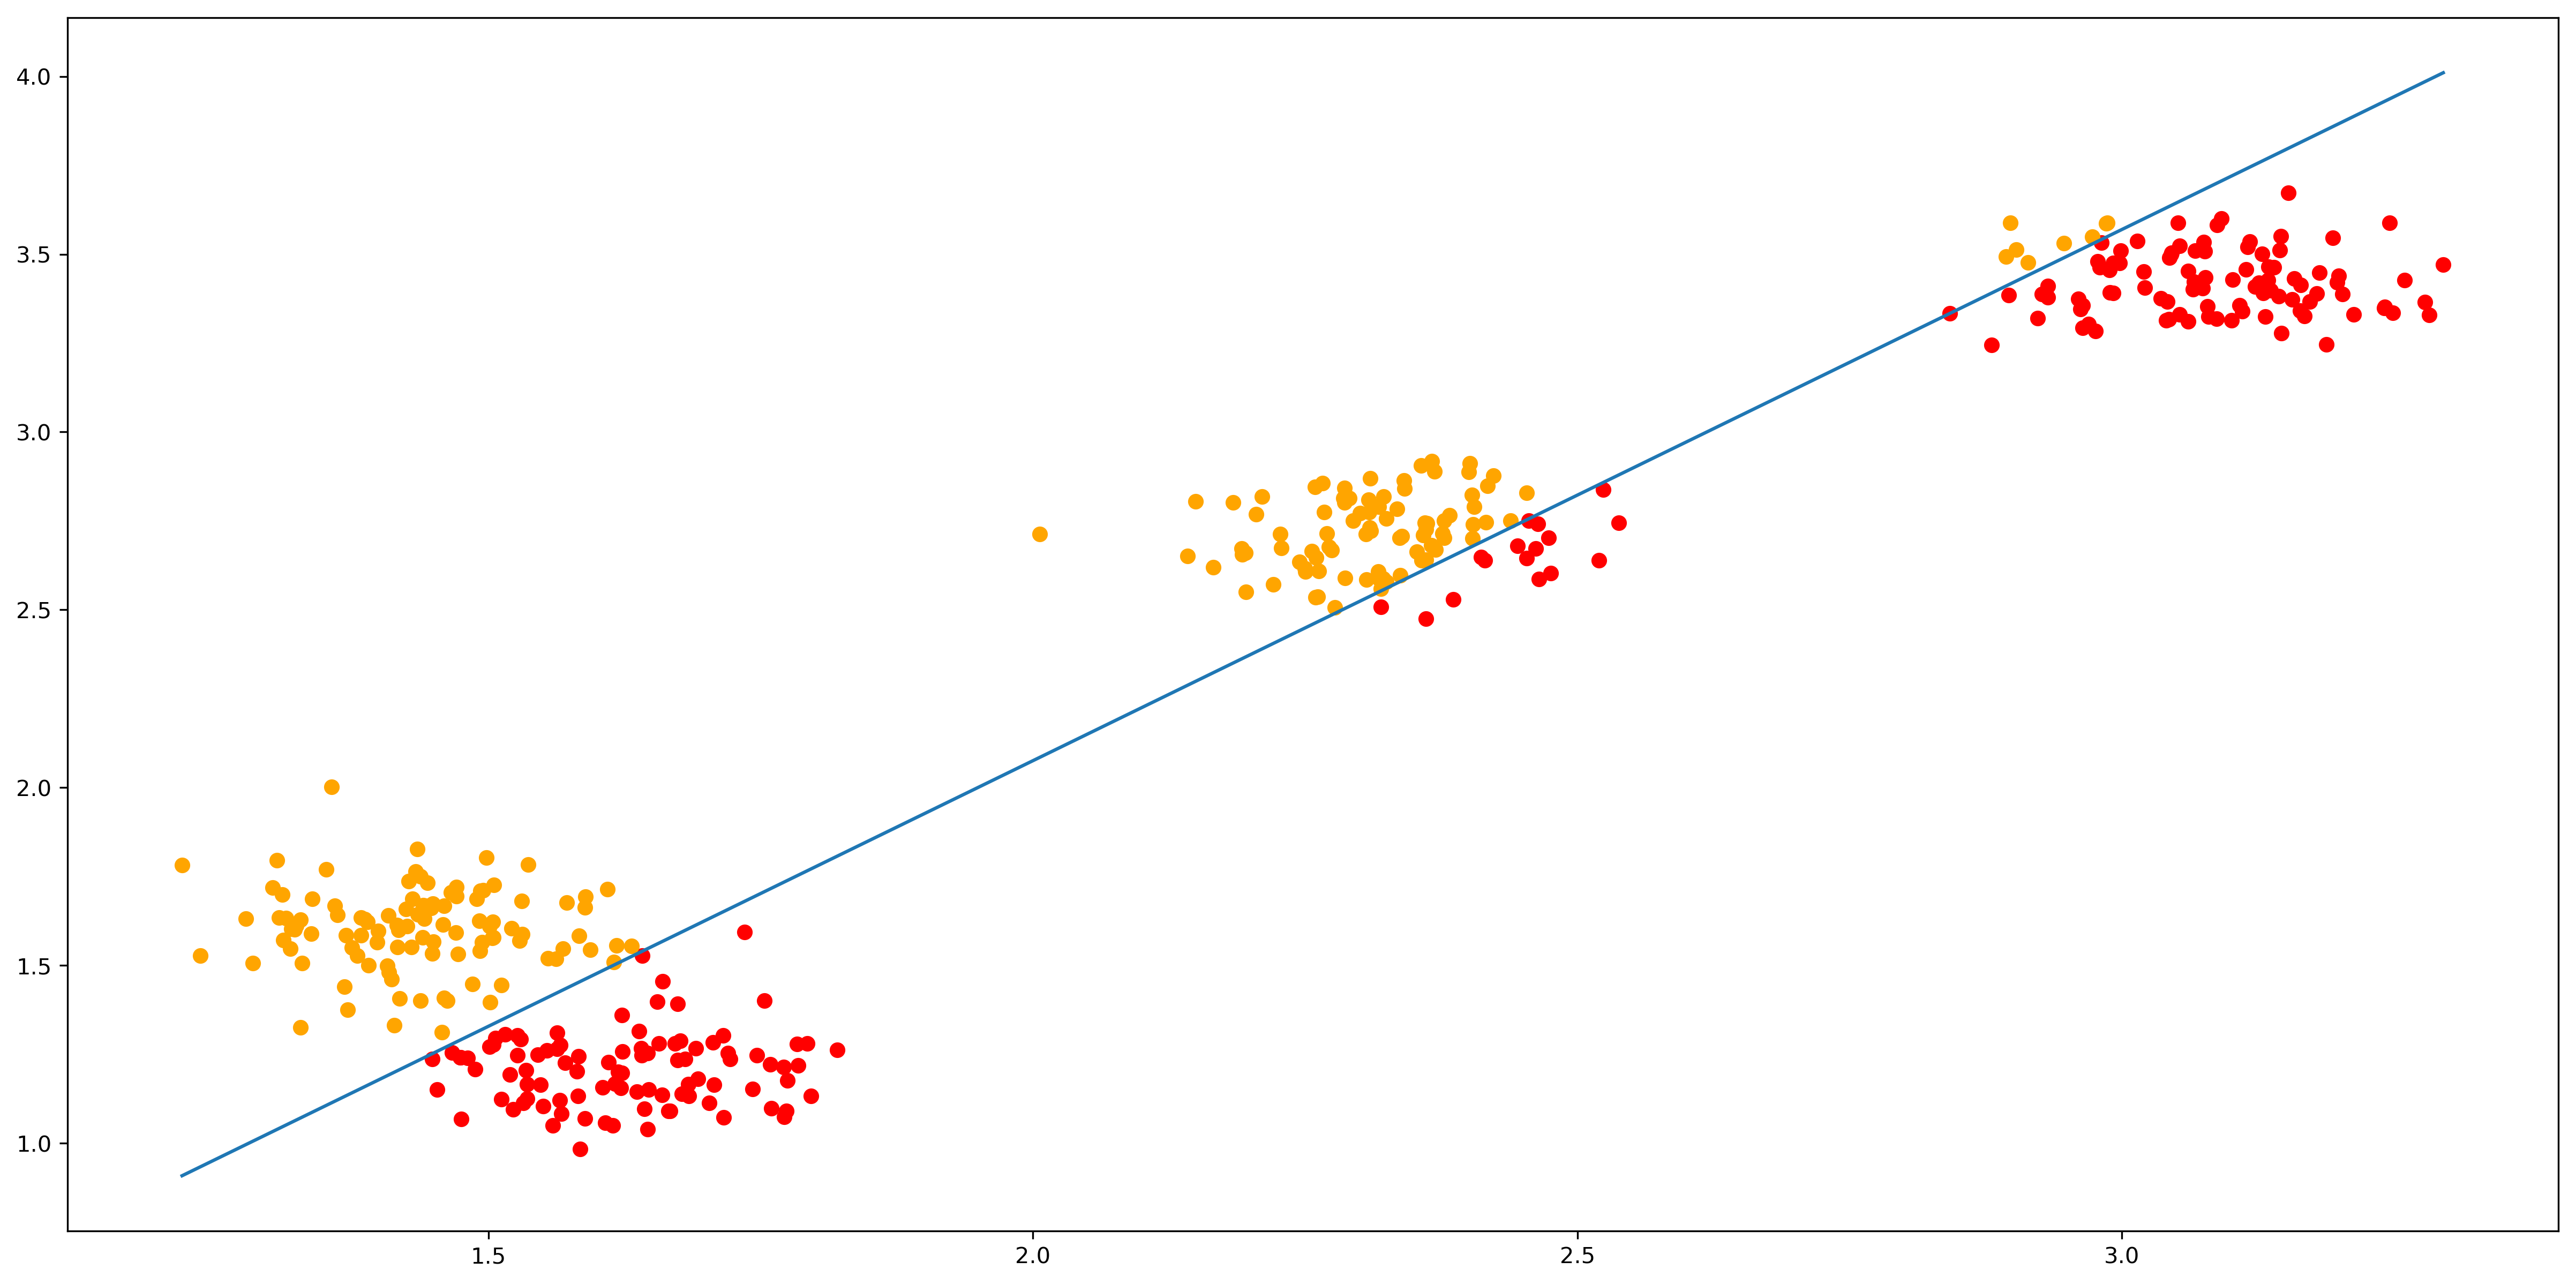

In [7]:
plt.figure(figsize=(20,10),dpi=300)

x = np.linspace(np.min(data[:,1]), np.max(data[:,1]), 1000)
if logreg.w[1]!=0:
    y = (-logreg.w[0]*x - logreg.b)/logreg.w[1]
else:
    y = np.zeros(x.size)
plt.plot(x,y)
plt.scatter(data[pred_act[:]==0][:,1],data[pred_act[:]==0][:,2],color='red')
plt.scatter(data[pred_act[:]==1][:,1],data[pred_act[:]==1][:,2],color='orange')

plt.show()

In [14]:
tr_size=200

idx = np.random.permutation(len(data))

train = data[idx[:tr_size]]
test = data[idx[tr_size:]]

In [15]:
cf = lin.LogisticRegression()
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
pred_cla = cf.predict(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
acc = met.accuracy_score(y_true=test[:,0],y_pred=pred_cla)
print(auc)
print(acc)
cf = ens.AdaBoostClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)
cf = ens.AdaBoostClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)
cf = ens.AdaBoostClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

0.9634853941576631
0.895
0.9990496198479392
0.9992997198879552
0.9944477791116446


In [10]:
cf = ens.RandomForestClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.RandomForestClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.RandomForestClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)

1.0
1.0
1.0


In [11]:
cf = ens.GradientBoostingClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.GradientBoostingClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.GradientBoostingClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)

0.9995980303487086
0.9995980303487086
0.9996985227615315


In [12]:
auc=np.zeros(100)
for i in range(100):
    cf = ens.AdaBoostClassifier(n_estimators=(i+1)*10)
    cf.fit(train[:,1:],train[:,0])
    pred = cf.decision_function(test[:,1:])
    auc[i] = met.roc_auc_score(test[:,0],pred)

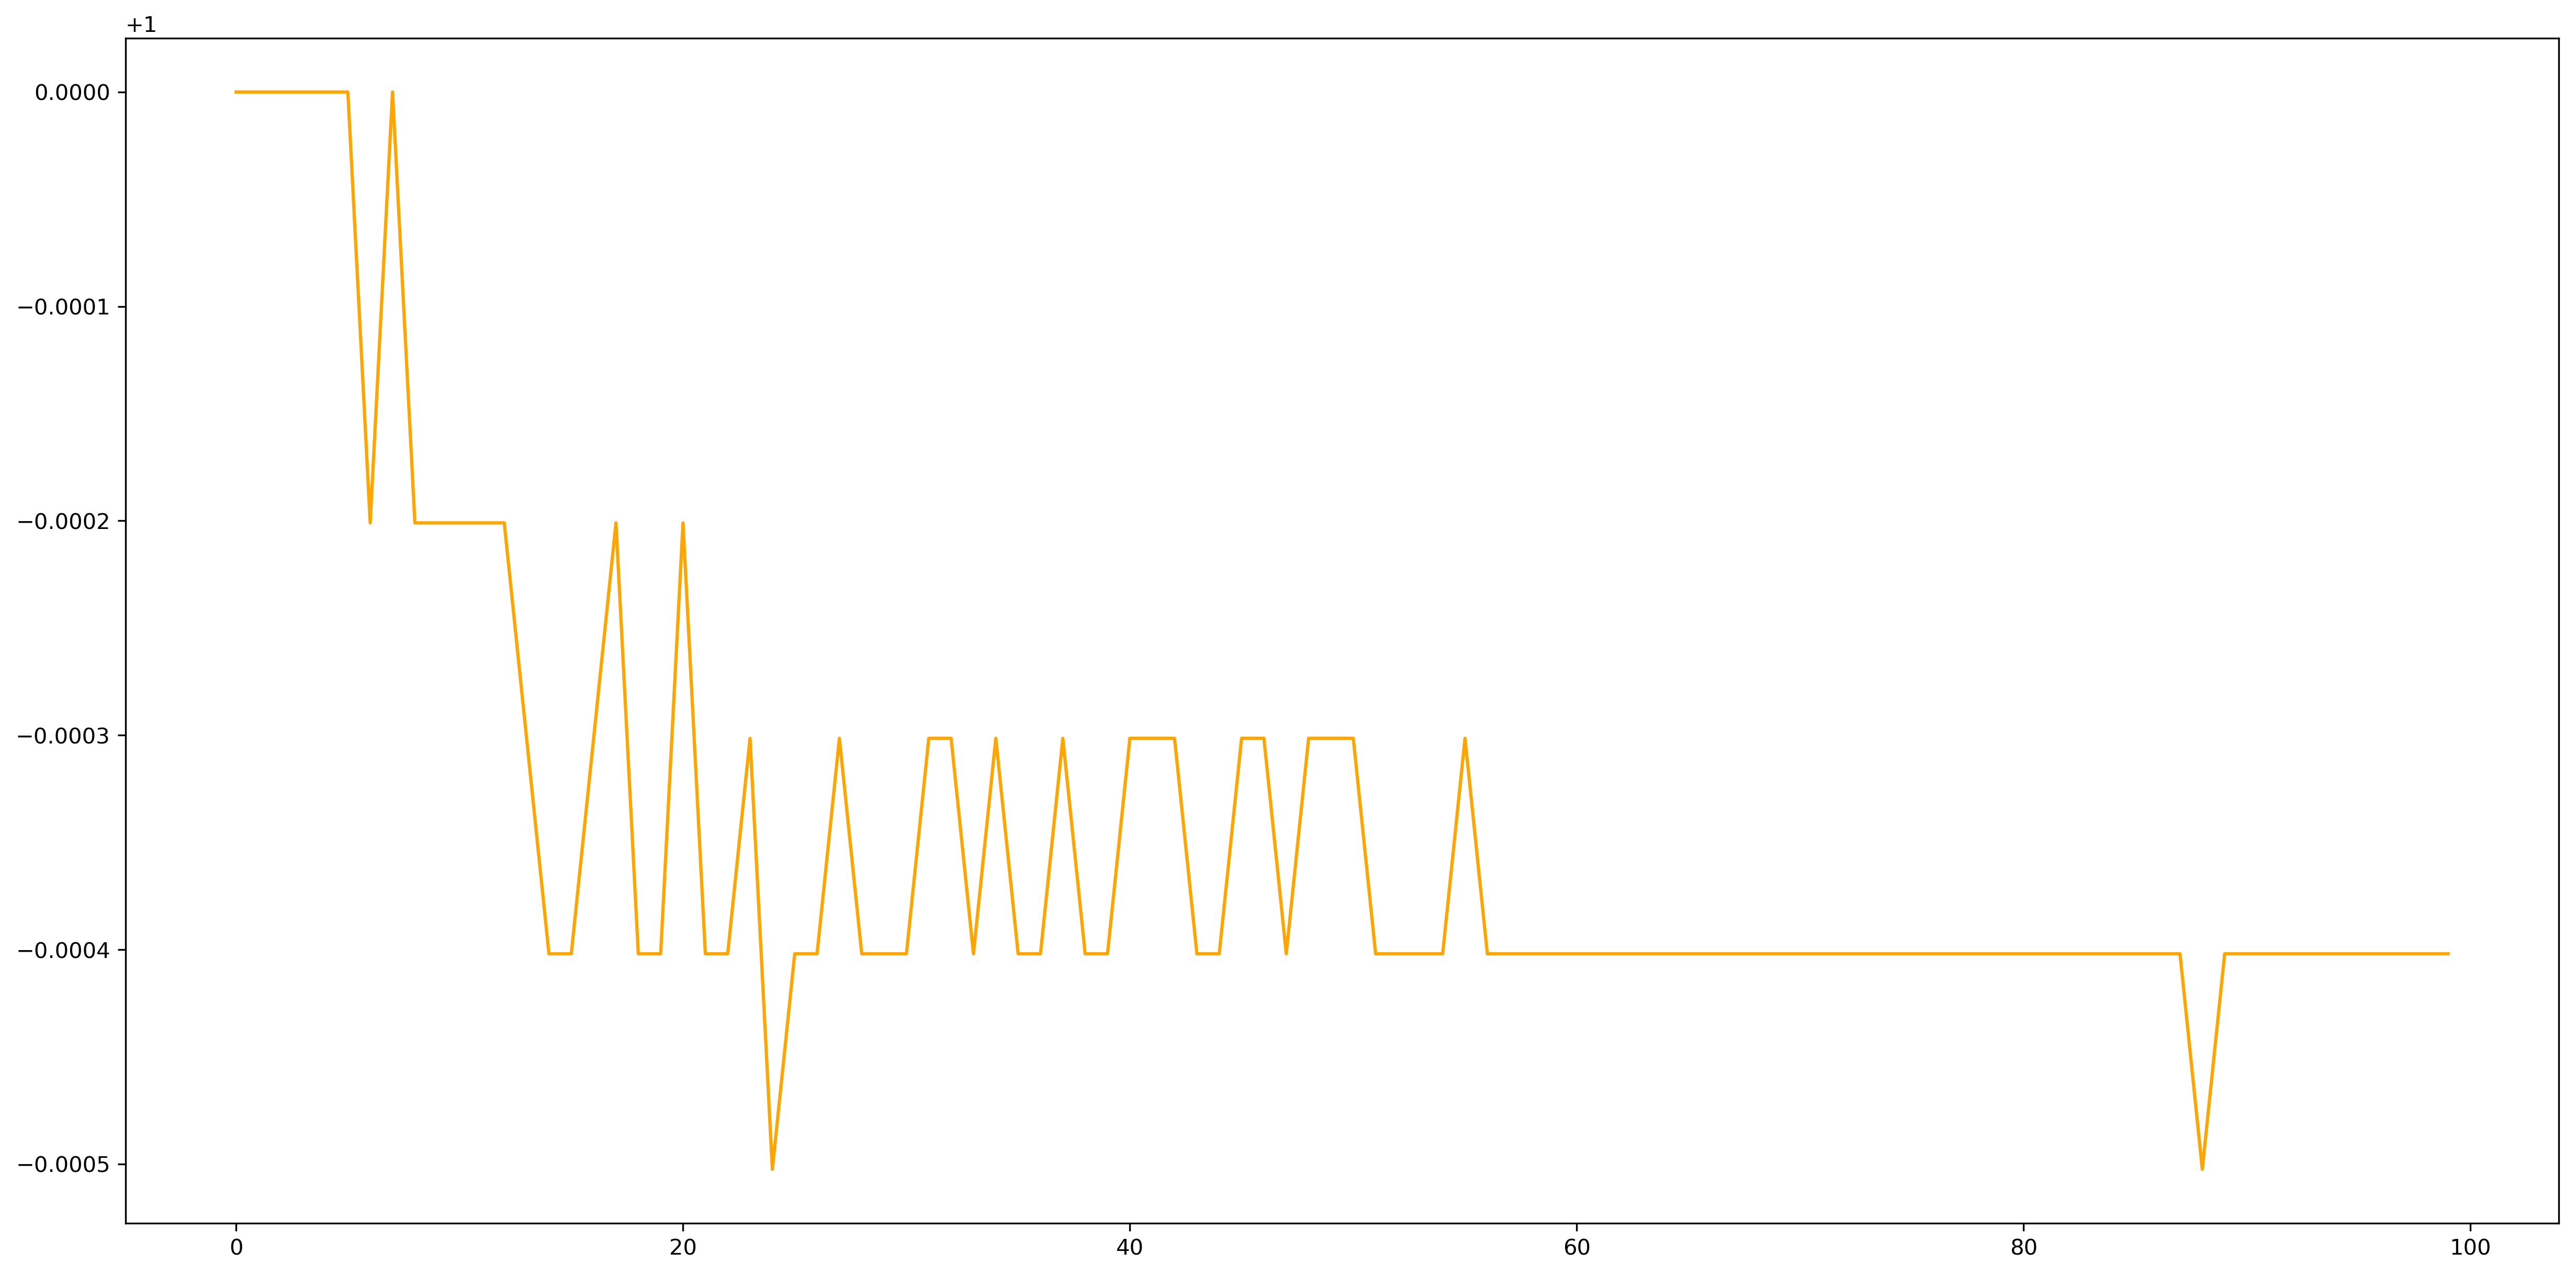

In [13]:
plt.figure(figsize=(20,10),dpi=300)
plt.plot(auc,color='orange')
plt.show()